# Введение в методы обработки и анализа данных

Бобряков А.С.

In [45]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
from scipy.fftpack import ifft
import scipy.stats as st
import scipy.signal as signal
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sympy
import random

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

# Интерполяция в полиномиальных базисах

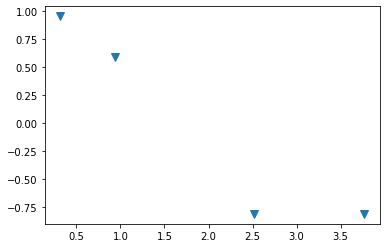

In [2]:
# Функция 1
x_a = np.array([0.1, 0.3, 1.2, 0.8]) * np.pi
y_a = np.cos(x_a)
plt.plot(x_a, y_a, 'v', markersize=8)

        3          2
0.1319 x - 0.6389 x + 0.05536 x + 0.9926


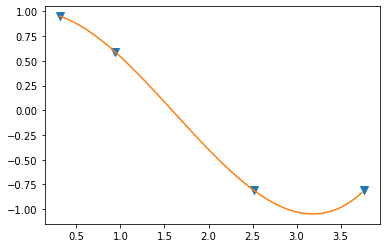

In [3]:
# Интерполяция полиномом 1
poly_a = interp.lagrange(x_a, y_a)
print (poly_a)
plt.plot(x_a, y_a, 'v', markersize=8)

x = np.arange (0.1, 1.2, 0.01)* np.pi
plt.plot(x, poly_a(x))

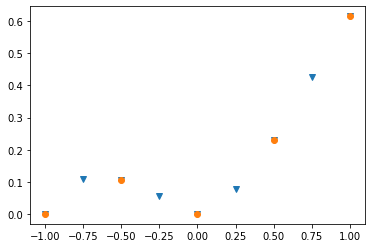

In [4]:
# Функция 2 (Полиномы разной степени)
x_f_1 = np.arange(-1.0, 1.25, 0.25)
x_f_2 = np.arange(-1.0, 1.25, 0.5)
y_f_1 = ((x_f_1**3 + x_f_1**2)/(x_f_1**4 + 3))**0.7
y_f_2 = ((x_f_2**3 + x_f_2**2)/(x_f_2**4 + 3))**0.7
plt.plot(x_f_1, y_f_1, 'v')
plt.plot(x_f_2, y_f_2, 'o')

        8          7         6          5         4          3
-2.689 x + 0.1759 x + 5.192 x - 0.4045 x - 3.449 x + 0.5206 x
          2
 + 1.253 x + 0.01573 x
         4          3          2
-0.4869 x + 0.2459 x + 0.7947 x + 0.06188 x


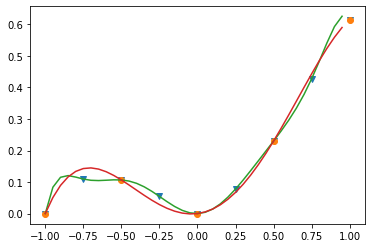

In [5]:
poly_f_1 = interp.lagrange(x_f_1, y_f_1)
poly_f_2 = interp.lagrange(x_f_2, y_f_2)
print (poly_f_1)
print (poly_f_2)

x = np.arange(-1.0, 1, 0.05)
plt.plot(x_f_1, y_f_1, 'v')
plt.plot(x_f_2, y_f_2, 'o')
plt.plot(x, poly_f_1(x))
plt.plot(x, poly_f_2(x))

## Сплайн - интерполяция

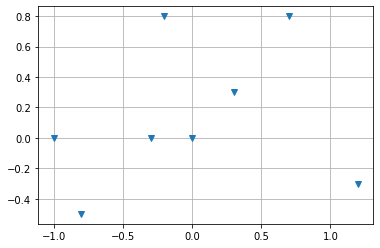

In [6]:
x = np.array([-1, -0.8, -0.3, -0.2, 0,  0.3,   0.7,  1.2])
y = np.array([0,  -0.5, -0,    0.8, 0,  0.3,   0.8, -0.3])
plt.grid()
plt.plot(x, y, 'v')

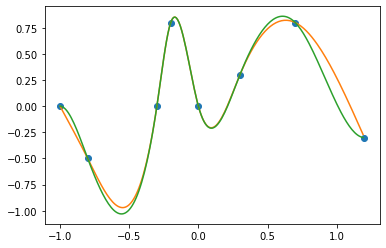

In [7]:
# Сплайн
cubic = interp.CubicSpline(x, y, bc_type='natural')  #natural   - оранжевый
x_d = np.arange (-1, 1.2, 0.01)
plt.plot(x, y, 'o')
plt.plot(x_d, cubic(x_d))

cubic2 = interp.CubicSpline(x, y, bc_type='clamped')  # clamped  - зеленый
plt.plot(x_d, cubic2(x_d))

##  Сглаживающая аппроксимация в полиномиальных базисах

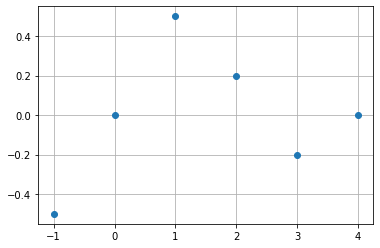

In [8]:
# Данные
x = np.array([-1,   0,  1,   2,    3,   4])
y = np.array([-0.5, 0,  0.5, 0.2, -0.2, 0])
plt.grid()
plt.plot (x,y, 'o')

### Аппроксимация полиномом 1-ой степени

[ 0.04571429 -0.06857143]

[-0.38571429  0.06857143  0.52285714  0.17714286 -0.26857143 -0.11428571]
0.30095087401672155 0.30095087401672155


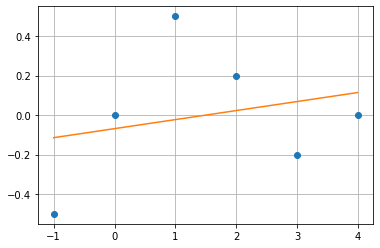

In [9]:
PolyCoef1 = np.polyfit(x, y, 1)
print (PolyCoef1); print()

# Функция для апроксимации  (k_power - степень полинома)
def p (x, y, k_power):  
    PolyCoef = np.polyfit(x, y, k_power)
    p = 0.
    for k in range(0, k_power+1):
        p += PolyCoef[k_power-k]*x**k
    return p 

def pl (x, y, x_plot, k_power):
    PolyCoef = np.polyfit(x, y, k_power)
    pl = 0.
    for k in range(0, k_power+1):
        pl += PolyCoef[k_power-k]*x_plot**k
    return pl

p1 = p (x, y, 1)
ErrorLocal = y - p1
ErrorGlobal = (np.sum ((ErrorLocal)**2)/len(x))**0.5
print (ErrorLocal)
print (ErrorGlobal,ErrorGlobal/(max(y)-min(y)))

x_plot = np.arange(-1, 4, 0.01)
y_plot1 = pl (x, y, x_plot, 1)
plt.grid()
plt.plot(x, y, 'o')
plt.plot(x_plot, y_plot1)

### Аппроксимация полиномом 2-ой степени

[-0.08214286  0.00785714  0.28       -0.06571429 -0.32928571  0.18928571]
0.19739373271278324 0.19739373271278324


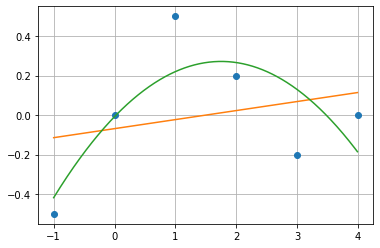

In [10]:
p2 = p (x, y, 2)

ErrorLocal = y - p2
ErrorGlobal = (np.sum ((ErrorLocal)**2)/len(x))**0.5

print (ErrorLocal)
print (ErrorGlobal,ErrorGlobal/(max(y)-min(y)))

x_plot = np.arange(-1, 4, 0.01)
y_plot1 = pl (x, y, x_plot, 1)
y_plot2 = pl (x, y, x_plot, 2)
plt.grid()
plt.plot(x, y, 'o')
plt.plot(x_plot, y_plot1)
plt.plot(x_plot, y_plot2)

#### С зашумлением

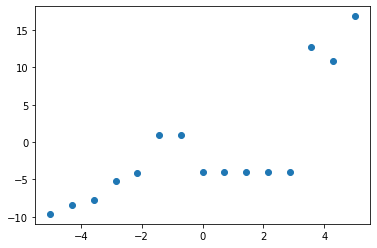

In [11]:
xleft = -5
xright = 5
n = 15
x = np.linspace(xleft,xright,n)
yf = np.zeros ((n))
# Начальная фукнция
for i in range(0,n):
    if (x[i]<-2) :
        yf[i] = 2.0*x[i] - 0.6*np.sin(3*x[i])
    elif (x[i]<0):
        yf[i] = 1.0
    elif (x[i]<np.pi):
        yf[i] = -4
    else:
        yf[i] = 3.0*x[i] + 2.0*np.sin(4*x[i])
plt.plot (x,yf, 'o')

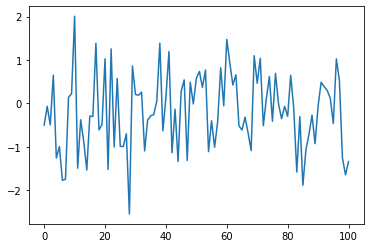

(array([0.04347889, 0.        , 0.04347889, 0.13043666, 0.17391554,
        0.21739443, 0.43478886, 0.08695777, 0.39130997, 0.69566218,
        0.3043522 , 0.3043522 , 0.34783109, 0.39130997, 0.34783109,
        0.17391554, 0.13043666, 0.13043666, 0.        , 0.04347889]),
 array([-2.54808858, -2.32036908, -2.09264958, -1.86493008, -1.63721058,
        -1.40949109, -1.18177159, -0.95405209, -0.72633259, -0.4986131 ,
        -0.2708936 , -0.0431741 ,  0.1845454 ,  0.4122649 ,  0.63998439,
         0.86770389,  1.09542339,  1.32314289,  1.55086239,  1.77858188,
         2.00630138]),
 <a list of 20 Patch objects>)

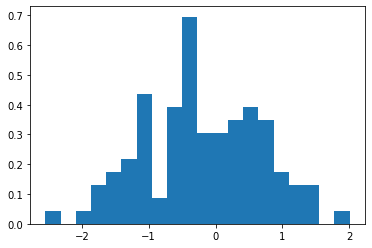

In [12]:
# Нормально распределенная случайная величина
Delta1 = 1.0 * np.random.randn(101)
plt.plot (Delta1)
plt.show()

num_bins = 20
plt.hist(Delta1, num_bins, density=1)

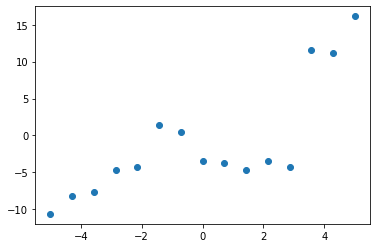

In [13]:
# Накладываем шум
Delta = 0.5 * np.random.randn(n)
y = yf + Delta
plt.plot (x, y, 'o')

### Функции вычисления коэффициентов разложения

In [14]:
# Метод наименьших квадратов
def SqLeast (x, y, m):
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    # Печатаем инфо
    cond = np.linalg.cond (G)
    condPhi = np.linalg.cond (Phi)
    print ('Число обусловленности', cond, condPhi)
    EigG = np.linalg.eigvals (G)
    print ('Максимальное и минимальное собственные значения G', max (EigG), min (EigG))
    return a

# Метод наименьших квадратов с регуляризацией
def SqLeastReg (x, y, m, alpha):
    global G
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    
    RegAlpha = np.eye (m+1) * alpha
        
    G = PhiT @ Phi + RegAlpha 
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    # Печатаем инфо
    cond = np.linalg.cond (G)
    condPhi = np.linalg.cond (Phi)
    print ('Число обусловленности', cond, condPhi)
    EigG = np.linalg.eigvals (G)
    print ('Максимальное и минимальное собственные значения G', max (EigG), min (EigG))
    return a

def BasicFunctions (num, x):
    PhiFun = x**num
    return PhiFun  

### Функция вычисления погрешности аппроксимации

In [377]:
# Функция для расчета погрешностей
def AppError (x,y,Coefs):
    PolynomValue = np.zeros(len(x))
    for i in range (0, m+1):
        PolynomValue += Coefs[i]*x**i
   
    y_av = np.sum(y)/len(x)
    y_disp = np.sum((y-y_av)**2)/len(x)
    
    ResLocal = (y - PolynomValue)  #  Погрешность каждой точки абсолютная
    ResLocalRel = ResLocal/y_disp**0.5  #  Погрешность каждой точки относительная
    ResGlobal = (np.sum ((ResLocal)**2)/len(x))**0.5  # Суммарная абсолютная
    ResGlobalRel = ResGlobal / y_disp**0.5  # cуммарная относительная
    
    return ResLocal, ResLocalRel, ResGlobal,  ResGlobalRel

# Функция считает коэффициент детерминации
def R2 (x, y, Coefs):
    PolynomValue = np.zeros(len(x))
    
    for i in range (0, m+1):
        PolynomValue += Coefs[i]*x**i
   
    y_av = np.sum(y)/len(x)
    y_disp = np.sum((y-y_av)**2)/len(x)    
      
    yv_disp = np.sum((PolynomValue-y_av)**2)/len(x)
    
    R2 = yv_disp/y_disp
        
    return R2

## Построение аппроксимационного полинома и оценка погрешности аппроксимации. Проблема обусловленности

Число обусловленности 7463.268884940257 86.39021290019096
Максимальное и минимальное собственные значения G 49212.77534917453 6.593997363337414
Коэффициенты полинома [-3.28609791 -0.37309216  0.24446477  0.13539388]
Погрешность каждой точки абсолютная [ 1.61279842 -0.30153502 -2.66156859 -1.30101534 -1.58010673  4.12283044
  3.3505271  -0.20001876 -0.39083854 -1.7558787  -1.86459299 -5.10686909
  6.97251827  0.84064445 -1.73689492]
Погрешность каждой точки относительная [ 0.21233176 -0.03969837 -0.35040681 -0.1712842  -0.20802776  0.54278814
  0.44111113 -0.02633332 -0.05145555 -0.23116889 -0.24548159 -0.67234101
  0.91796165  0.11067441 -0.2286696 ]
Погрешность абсолютная 2.913889950673005
Погрешность относительная 0.38362599206369397
Коэффициент детерминации 0.8528310982131467


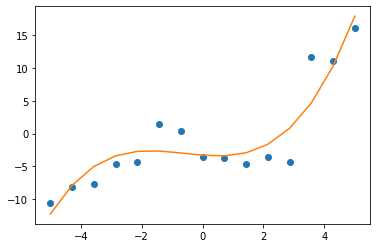

In [16]:
#  Апроксимация
m = 3  # степень полинома
PolynomCoefs = SqLeast (x, y, m)
print ('Коэффициенты полинома', PolynomCoefs)

PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
    
ResLocal, ResLocalRel, ResGlobal, ResGlobalRel = AppError (x,y,PolynomCoefs)
print('Погрешность каждой точки абсолютная', ResLocal)
print('Погрешность каждой точки относительная', ResLocalRel)
print('Погрешность абсолютная', ResGlobal)
print('Погрешность относительная', ResGlobalRel)

R2 = R2(x,y,PolynomCoefs)
print('Коэффициент детерминации', R2)

plt.plot (x, y, 'o')
plt.plot (x, PolynomValue)

### Разделение данных на обучающий и тестовый наборы

[ 2  0 14]
Число обусловленности 2789.1913815565376 52.81279562337644
Максимальное и минимальное собственные значения G 15856.152562890467 5.684856431057134
2.8509341588306705 5.698092564964881


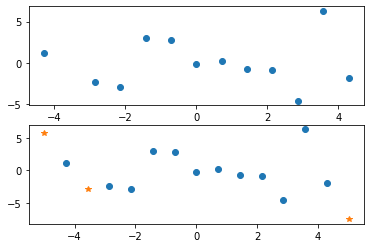

In [17]:
n = len(x)
ntest = int (n/4)  #Количество элементов в тестовых
ntrain = n - ntest #Количество элементов в тренировочных

xtrain = np.zeros (ntrain)
ytrain = np.zeros (ntrain)
xtest = np.zeros (ntest)
ytest = np.zeros (ntest)

# cлучайная выборку из массива
indtest = np.random.choice (len(x), ntest, replace = False)
print (indtest)

itest = -1
itrain = -1
for i in range (0,n):
    ktest = 0
    # заполняем xtest и ytest
    for k in range (0, ntest): 
        if (i==indtest[k]):
            itest += 1
            xtest [itest] = x[i]
            ytest [itest] = y[i]
            ktest = 1  
    # заполняем xtrain и ytrain        
    if (ktest !=1 ):
        itrain += 1
        xtrain [itrain] = x[i]
        ytrain [itrain] = y[i]

PolynomCoefsTrain = SqLeast (xtrain, ytrain, m)

# Погрешности теста и тренировочной выборки
ResLocalTrain, ResLocalRelTrain, ResGlobalTrain, ResGlobalRelTrain = AppError (xtrain,ytrain,PolynomCoefsTrain)
ResLocalTest, ResLocalRelTest, ResGlobalTest, ResGlobalRelTest = AppError (xtest,ytest,PolynomCoefsTrain)    
print (ResGlobalTrain, ResGlobalTest)

plt.subplot (2,1,1)
plt.plot (xtrain, ResLocalTrain, 'o')  # тестовая выборка с их абсолютными погрешностями
plt.subplot (2,1,2)
plt.plot (xtrain, ResLocalTrain, 'o')   # тренировочная выборка с их абсолютными погрешностями
plt.plot (xtest, ResLocalTest, '*')   # тестовая выборка с их абсолютными погрешностями

##  Робастная сглаживающая аппроксимация.

In [18]:
def SqLeastRobust (x, y, m):
    global G, Phi
    n = len(x)
    yr = np.eye (n)
    E = np.eye (n)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    dist = 1.5
    
    yr = y @ E 
    
    eps = 0.001
    
    # итерационный процесс
    print ()
    print ('Итерационный процесс')
    print ()
    for it in range (10):
        ait = a  
        PhiA = Phi @ a
        res = Phi @ a - yr        
        for i in range (0, n):
            if (res[i]>dist):
                yr[i] = PhiA[i]-dist
            if (res[i]<-dist):
                yr[i] = PhiA[i]+dist
                    
        z = PhiT @ yr
        a = np.linalg.solve(G, z)
        
        eit = a - ait
        epsit = (sum(eit**2))**0.5/len(eit)
        print ('iteration', it, a, epsit)
        if (epsit<=eps):
            print ()
            break 
             
     # Печатаем инфо
    cond = np.linalg.cond (G)
    condPhi = np.linalg.cond (Phi)
    print ('Число обусловленности', cond, condPhi)
    EigG = np.linalg.eigvals (G)
    print ('Максимальное и минимальное собственные значения G', max (EigG), min (EigG))
    
    return a

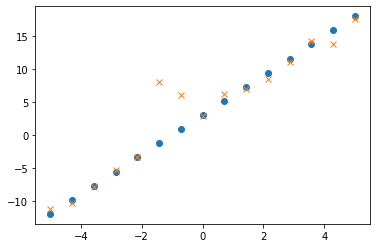

In [19]:
# Функция с зашумлением
xleft = -5
xright = 5
n = 15
x = np.linspace(xleft,xright,n)
y = np.zeros(n)
# Начальная фукнция
for i in range(0,n):
        y[i] = 3*x[i] + 3
plt.plot (x,y, 'o')

Delta = 1 * np.random.randn(n)
yf = y + Delta
yf[5] = 8
yf[6] = 6
plt.plot (x, yf, 'x')

Число обусловленности 9.523809523809526 3.0860669992418384
Максимальное и минимальное собственные значения G 142.8571428571429 15.0
Коэффициенты [3.78834759 2.78266729]


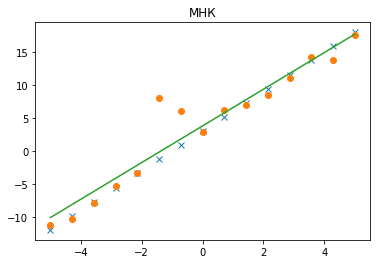

Число обусловленности 9.518130769962884 3.0860669992418384
Максимальное и минимальное собственные значения G 142.86714285714288 15.01
Коэффициенты [3.78582371 2.78247251]


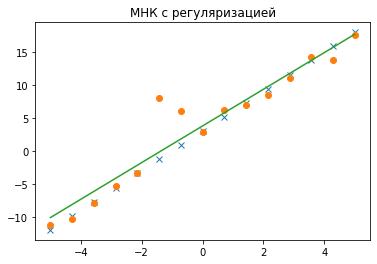


Итерационный процесс

iteration 0 [3.26366651 2.84791024] 0.26436096546869686
iteration 1 [3.18438861 2.85694551] 0.03989555553571026
iteration 2 [3.17252747 2.85829602] 0.005968888282465804
iteration 3 [3.17075306 2.85849805] 0.0008929401200153494

Число обусловленности 9.523809523809526 3.0860669992418384
Максимальное и минимальное собственные значения G 142.8571428571429 15.0
Коэффициенты [3.17075306 2.85849805]
[-11.12173722  -9.07995289  -7.03816857  -4.99638424  -2.95459992
  -0.91281559   1.12896873   3.17075306   5.21253738   7.25432171
   9.29610603  11.33789035  13.37967468  15.421459    17.46324333]


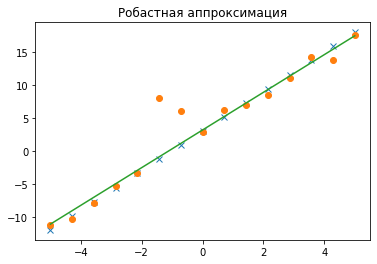

In [20]:
# МНК
m = 1
PolynomCoefs = SqLeast (x, yf, m)
print ('Коэффициенты', PolynomCoefs)
# строим полином
PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
plt.title('МНК')
plt.plot (x, y, 'x')  # истинные точки
plt.plot (x, yf, 'o')
plt.plot (x, PolynomValue)
plt.show()

# МНК с регуляризацией
m = 1
PolynomCoefs = SqLeastReg (x, yf, m, 0.01)
print ('Коэффициенты', PolynomCoefs)
# строим полином
PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
plt.title('МНК с регуляризацией')   
plt.plot (x, y, 'x')  # истинные точки
plt.plot (x, yf, 'o')
plt.plot (x, PolynomValue)
plt.show()

# Робастная аппроксимация
m = 1
PolynomCoefs = SqLeastRobust (x, yf, m)
print ('Коэффициенты', PolynomCoefs)
# строим полином
PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
print(PolynomValue)     
plt.title('Робастная аппроксимация')   
plt.plot (x, y, 'x')  # истинные точки
plt.plot (x, yf, 'o')
plt.plot (x, PolynomValue)
plt.show()

In [21]:
# Борьба с выбросами. Своя реализация:
# Уравнение вида (PhiT * R * Phi * a) = (PhiT * R * y)
# где R(x) = (f(Phi*a - y)) / ((Phi*a - y)**2), гду f = np.abs()
def SqLeastRobustMy (x, y, m):
    global G, Phi
    n = len(x)
    
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    E = np.eye (n)
    yr = y @ E 
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    print('Начальное a', a)
    # Борьба с выборсами 
    R = np.eye(n);
    dist = 1.5
    
    eps = 0.001  # Погрешность для выхода из итераций
    
    # итерационный процесс
    print ()
    print ('Итерационный процесс')
    print ()
    for it in range (15):
        ait = a  
        PhiA = Phi @ a
        # рассчитываем R
        for i in range (0, n):
            param = PhiA[i] - yr[i]
            R[i, i] = (np.abs(param)) / (param**2)
        # пересчитываем a  
        G = PhiT @ R @ Phi
        z = PhiT @ R @ yr
        a = np.linalg.solve((G), (z))
        
        eit = a - ait
        epsit = (sum(eit**2))**0.5/len(eit)
        print ('iteration', it, a, epsit)
        if (epsit<=eps):
            print ()
            break 
             
     # Печатаем инфо
    cond = np.linalg.cond (G)
    condPhi = np.linalg.cond (Phi)
    print ('Число обусловленности', cond, condPhi)
    EigG = np.linalg.eigvals (G)
    print ('Максимальное и минимальное собственные значения G', max (EigG), min (EigG))
    
    return a

Начальное a [3.78834759 2.78266729]

Итерационный процесс

iteration 0 [3.2628619  2.87600958] 0.26685576217038864
iteration 1 [3.06325498 2.89444924] 0.10022842069110897
iteration 2 [3.00789632 2.90333262] 0.028033441618903324
iteration 3 [2.96297186 2.91061196] 0.02275519759515163
iteration 4 [2.94218028 2.91288811] 0.010457897715714884
iteration 5 [2.93869249 2.91149517] 0.0018778335762195872
iteration 6 [2.93480384 2.91002544] 0.002078559471479567
iteration 7 [2.93068554 2.90855316] 0.002186780902197735
iteration 8 [2.92668088 2.90718744] 0.00211556780690253
iteration 9 [2.92332722 2.90608022] 0.0017658538615413265
iteration 10 [2.92122646 2.90539865] 0.0011042766476805253
iteration 11 [2.92051325 2.90516886] 0.0003746574861888478

Число обусловленности 3.4578992298432523 3.0860669992418384
Максимальное и минимальное собственные значения G 4194.341420869772 1212.9738728852158
Коэффициенты [2.92051325 2.90516886]
[-11.60533106  -9.53021045  -7.45508983  -5.37996921  -3.3048486
  -1.

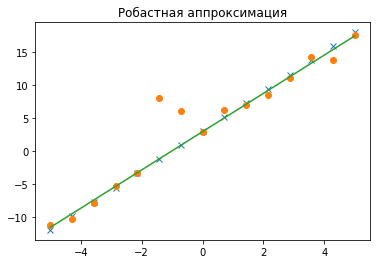

In [22]:
# Робастная аппроксимация Своя реализация
m = 1
PolynomCoefs = SqLeastRobustMy (x, yf, m)
print ('Коэффициенты', PolynomCoefs)
# строим полином
PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
print(PolynomValue)    
plt.title('Робастная аппроксимация')   
plt.plot (x, y, 'x')  # истинные точки
plt.plot (x, yf, 'o')
plt.plot (x, PolynomValue)
plt.show()

In [23]:
# Борьба с выбросами. Используем метрику Хьюберта
# Уравнение вида (PhiT * R * Phi * a) = (PhiT * R * y)
# где R(x) = (Phi*a - y)**2 если |Phi*a - y|<=dist 
#     R(x) = -dist**2 + 2*dist*(Phi*a - y) если |Phi*a - y|>dist 
def SqLeastRobustHubert (x, y, m):
    global G, Phi
    n = len(x)
    
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    E = np.eye (n)
    yr = y @ E 
    G = PhiT @ Phi
    z = PhiT @ yr
    a = np.linalg.solve(G, z)
    print('Начальное a', a)
    # Борьба с выборсами 
    R = np.eye(n);
    dist = 0.5
    
    eps = 0.001  # Погрешность для выхода из итераций
    
    # итерационный процесс
    print ()
    print ('Итерационный процесс')
    print ()
    for it in range (14):
        ait = a  
        PhiA = Phi @ a
        # рассчитываем R
        for i in range (0, n):
            param = PhiA[i] - yr[i]
            # Хьюберт
            if (np.abs(param) <= dist):
                R[i, i] = param**2
            else:
                R[i, i] = dist*np.abs(param) - (dist**2)
        # пересчитываем a  
        G = PhiT @ R @ Phi
        z = PhiT @ R @ yr
        a = np.linalg.solve((G), (z))
        
        eit = a - ait
        epsit = (sum(eit**2))**0.5/len(eit)
        print ('iteration', it, a, epsit)
        if (epsit<=eps):
            print ()
            break 
             
     # Печатаем инфо
    cond = np.linalg.cond (G)
    condPhi = np.linalg.cond (Phi)
    print ('Число обусловленности', cond, condPhi)
    EigG = np.linalg.eigvals (G)
    print ('Максимальное и минимальное собственные значения G', max (EigG), min (EigG))
    
    return a

Начальное a [3.78834759 2.78266729]

Итерационный процесс

iteration 0 [6.88259699 2.65411876] 1.548459237643163
iteration 1 [3.49922697 2.81695838] 1.6936432170788924
iteration 2 [7.74031465 2.48912777] 2.1268696225465544
iteration 3 [3.18796001 2.85754033] 2.2836188713146357
iteration 4 [7.84009999 2.06657707] 2.359450639216161
iteration 5 [3.15667467 2.91044394] 2.3794213591940134
iteration 6 [7.9694884  1.64388321] 2.488340416816559
iteration 7 [3.20764991 2.97060382] 2.471603397135615
iteration 8 [8.17049423 1.63282816] 2.5699935557044524
iteration 9 [3.15950711 2.96220416] 2.592162827927596
iteration 10 [8.11416076 1.58878376] 2.5707429099376475
iteration 11 [3.19287793 2.97314089] 2.55614306026306
iteration 12 [8.19221648 1.63381451] 2.5878167013739097
iteration 13 [3.15380278 2.96099722] 2.605140429702286
Число обусловленности 24.18368639320737 3.0860669992418384
Максимальное и минимальное собственные значения G 402.1271393200061 16.62803316176621
Коэффициенты [3.15380278 2.960

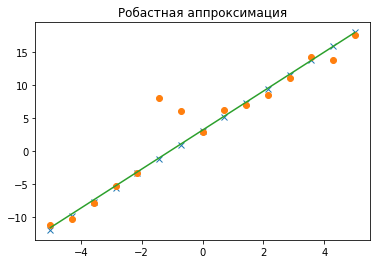

In [24]:
# Робастная аппроксимация с метрикой Хьюберта
m = 1

PolynomCoefs = SqLeastRobustHubert (x, yf, m)
print ('Коэффициенты', PolynomCoefs)
# строим полином
PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
print(PolynomValue)    
plt.title('Робастная аппроксимация')   
plt.plot (x, y, 'x')  # истинные точки
plt.plot (x, yf, 'o')
plt.plot (x, PolynomValue)
plt.show()

# Свертка данных. Ядерное сглаживание

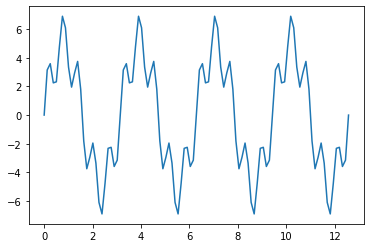

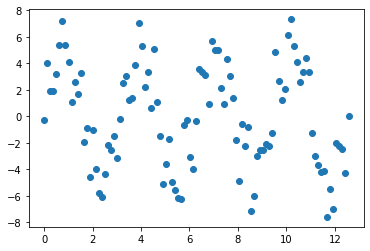

In [25]:
# Исходные данные
x = np.linspace(0, np.pi * 4, 101)
y = 5*np.sin(x * 2) +  2*np.sin(x * 10) 

n = len(x)
yd = np.zeros(len(x))

plt.plot(x, y)
Delta = 1.0 * np.random.randn(len(x))
yd = y + Delta
y_av = np.sum(y)/len(x)

plt.figure ()

plt.plot (x, yd, 'o')

2 2.2418770017659226 2.148471528990937


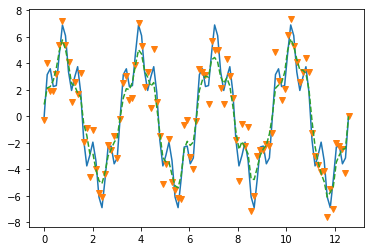

In [26]:
Conv = np.zeros ((len(x)))
W = np.zeros ((2*len(x)))

W [-2] = 0.5/5
W [-1] = 1./5.
W [0] = 2./5.
W [1] = 1./5.
W [2] = 0.5/5.

for i in range (0, n-1):
    
    Conv [i] = 0.
    
    for k in range (0, n-1):
        Conv[i] = Conv[i] + yd[k]*W[i-k]
        
for i in range (2, 3):
        print (i, Conv[i], np.sum(yd[(i-2):(i+3)])/5.)

plt.figure ()
plt.plot (x, y)
plt.plot (x, yd, 'v')
plt.plot (x, Conv, '--')

# Автокорреляция

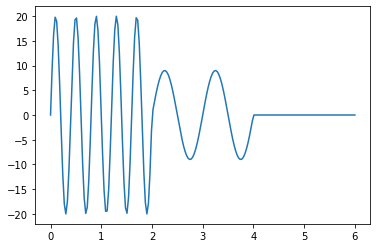

In [27]:
x = np.linspace(0, np.pi * 6, 200)
n = len(x)
L = max(x) - min(x)

def function(x):
    if (x <= np.pi * 2):
        return 20 * np.sin(x[x <= np.pi * 2] * 5)
    elif ((x > np.pi * 2) and (x <= np.pi * 4)):
        return 9 *np.sin(x * 2)
    else: 
        return 0
    
y = [function(t) for t in x]

plt.plot(x/np.pi, y)

[-0.00528428]


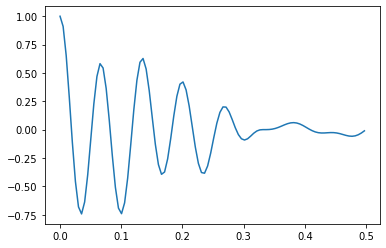

In [28]:
# Автокорреляционная функция
Ac = np.zeros (n)

y_av = np.sum(y)/n

print (y_av)

for k in range (0, n-1):
    
    Ac [k] = 0.
    
    for i in range (0, n-k-1):
        Ac[k] = Ac[k] + (y[i]-y_av)*(y[i+k]-y_av)/(n-k-1)
        
plt.plot (x[0:int(n/2)]/L, Ac[0:(int(n/2))]/Ac[0])       


# Спектральный анализ

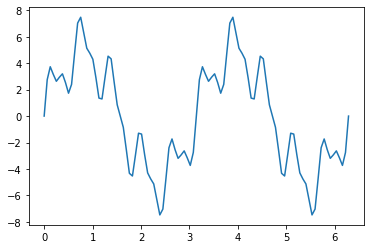

In [29]:
# Исходные данные
x = np.linspace(0, np.pi * 2, 101)
y = 5*np.sin(x * 2) +  2*np.sin(x * 10) +  np.sin(x * 20)

plt.plot(x, y)

-5.417888360170765e-16


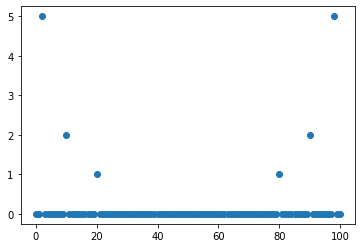

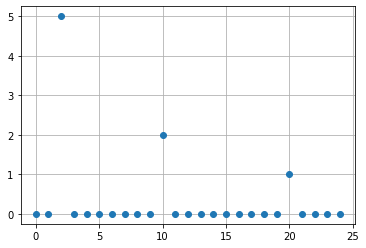

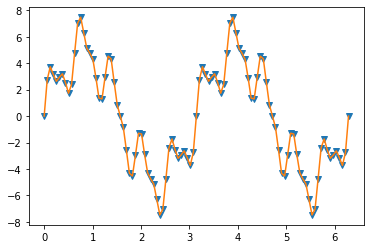

In [30]:
L = max(x) - min(x)
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

n = len(x)

dx = L / (n-1)

# --------------------------------------------------------------------------------------
#                                                                 Прямое преобразование
# --------------------------------------------------------------------------------------

a[0] = 1./L * np.sum (y [:(n-1)]) * dx
b[0] = 0.

print (a[0])

for k in range (1, n-1):
    
    CosTerm = np.cos(2.* np.pi * k * x / L) * dx
    SinTerm =  np.sin(2.* np.pi * k * x / L) * dx
    
    a[k]  = 2./L * np.sum (y[:(n-1)]*CosTerm [:(n-1)])
    b[k]  = 2./L * np.sum (y[:(n-1)]*SinTerm [:(n-1)])
           
    A = (a**2+b**2)**(0.5)

plt.plot (A[0:n], 'o')
plt.figure ()
plt.grid ()
plt.plot (A[0:25], 'o')

# --------------------------------------------------------------------------------------
#                                                                Обратное преобразование
# --------------------------------------------------------------------------------------

m = int(n/2)

yf = np.zeros (n)

for k in range (0, m):
    
    yf += a[k]*np.cos(2.* np.pi * k * x / L) + b[k]*np.sin(2.* np.pi * k * x / L)
    
plt.figure ()
plt.plot (x,y, 'v')
plt.plot (x,yf)

### Быстрое ДПФ (FFT)

G:\Programs\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


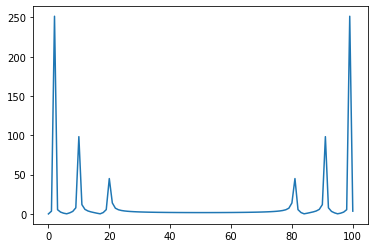

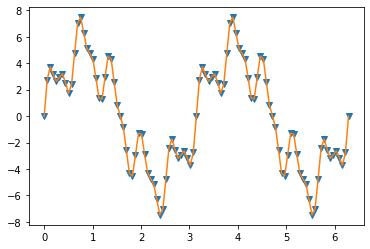

In [31]:
# --------------------------------------------------------------------------------------
#                                                                             Прямое FFT
# --------------------------------------------------------------------------------------
y_fft = fft.fft(y)

plt.plot(np.abs(y_fft))
plt.figure ()

# --------------------------------------------------------------------------------------
#                                                                           Обратное FFT
# --------------------------------------------------------------------------------------

yf = ifft(y_fft )
plt.plot (x,y,'v')
plt.plot (x,yf)

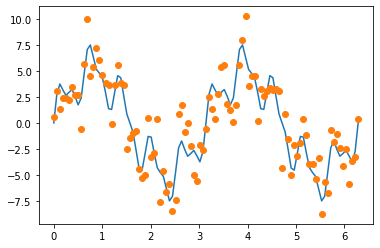

In [32]:
# Данные с шумом
Delta = 2.0 * np.random.randn(len(x))
yd = y + Delta
plt.plot(x, y)
plt.plot(x, yd, 'o')

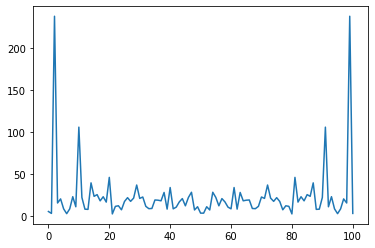

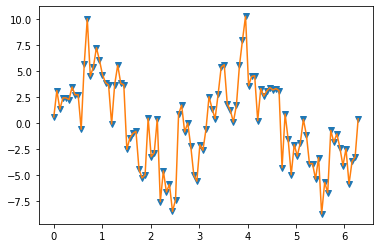

In [33]:
# --------------------------------------------------------------------------------------
#                                                                             Прямое FFT
# --------------------------------------------------------------------------------------
y_fft = fft.fft(yd)

plt.plot(np.abs(y_fft))
plt.figure ()

# --------------------------------------------------------------------------------------
#                                                                           Обратное FFT
# --------------------------------------------------------------------------------------

yf = ifft(y_fft )
plt.plot (x,yd,'v')
plt.plot (x,yf)

## Оконное преобразование

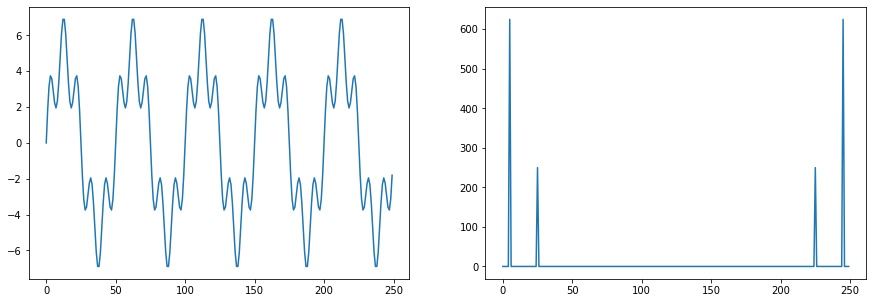

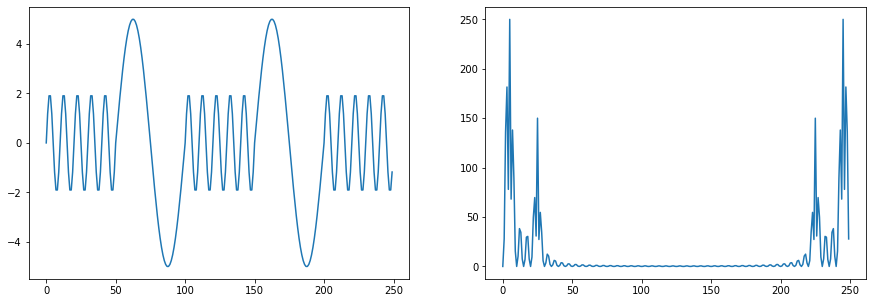

In [34]:
# Функия 1 для анализа 
def function1(x):
    return 2*np.sin(2*np.pi*x /10) + 5*np.sin(2*np.pi*x /50)
# Функия 2 для анализа 
def function2(x):
    if (x<50 or (x>100 and x<150) or x>200):
        return 2*np.sin(2*np.pi*x /10)
    else:
        return 5*np.sin(2*np.pi*x /50)
    
# Первая функция
x1 = [t for t in np.arange(0,250,1)]
y1 = [function1(t) for t in np.arange(0,250,1)]
y_fft1 = fft.fft(y1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(x1, y1)
ax2.plot(np.abs(y_fft1))
# Вторая функция
x2 = [t for t in np.arange(0,250,1)]
y2 = [function2(t) for t in np.arange(0,250,1)]
y_fft2 = fft.fft(y2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(x2, y2)
ax2.plot(np.abs(y_fft2))

(26, 11) (26, 11) (26, 11)
(16, 18) (16, 18) (16, 18)


Text(0.5, 0, 'Амплитуда')

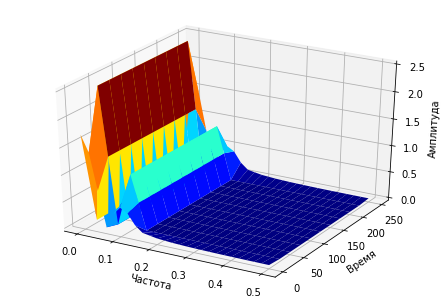

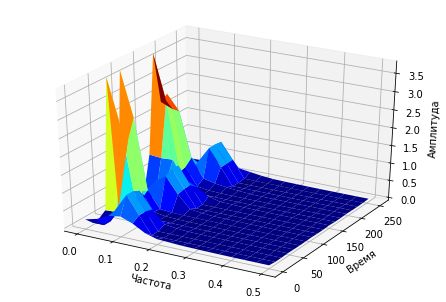

In [35]:
# ОКОННОЕ ПРЕОБРАЗОВАНИЕ ФУРЬЕ
# Первая функция
f1, t1, Z1 = signal.stft(y1, nperseg=50)
X1, Y1 = np.meshgrid(t1, f1)
print(X1.shape, Y1.shape, Z1.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Y1, X1, np.abs(Z1), rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Частота")
ax.set_ylabel("Время")
ax.set_zlabel("Амплитуда")

# Первая функция
f2, t2, Z2 = signal.stft(y2, nperseg=30)
X2, Y2 = np.meshgrid(t2, f2)
print(X2.shape, Y2.shape, Z2.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Y2, X2, np.abs(Z2), rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Частота")
ax.set_ylabel("Время")
ax.set_zlabel("Амплитуда")

(6, 51) (6, 51) (6, 51)
(51, 6) (51, 6) (51, 6)


Text(0.5, 0, 'Амплитуда')

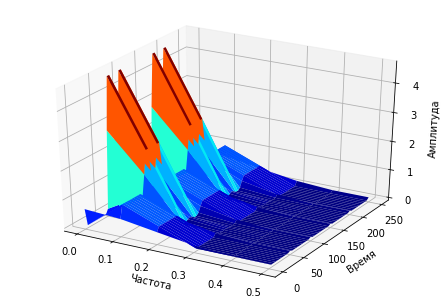

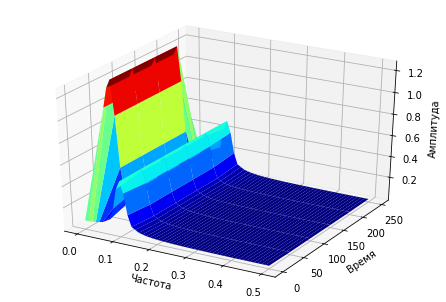

In [36]:
# МАЛОЕ ОКНО
f2, t2, Z2 = signal.stft(y2, nperseg=10)
X2, Y2 = np.meshgrid(t2, f2)
print(X2.shape, Y2.shape, Z2.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Y2, X2, np.abs(Z2), rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Частота")
ax.set_ylabel("Время")
ax.set_zlabel("Амплитуда")

# БОЛЬШОЕ ОКНО
f2, t2, Z2 = signal.stft(y2, nperseg=100)
X2, Y2 = np.meshgrid(t2, f2)
print(X2.shape, Y2.shape, Z2.shape)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Y2, X2, np.abs(Z2), rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel("Частота")
ax.set_ylabel("Время")
ax.set_zlabel("Амплитуда")

## Wavelet-преобразование

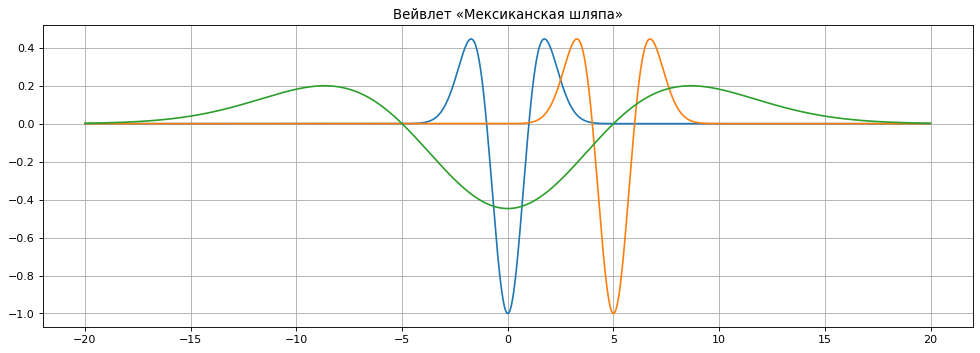

In [37]:
# Вейвлет "Мексиканская шляпа"
def HAT(s,T,t):
    # s - масштаб, T - сдвиг по времени, t - время по которому интегрируем
    f = (1/s**0.5)*np.exp(-0.5*((t-T)/s)**2)* (((t-T)/s)**2-1)  # формула шляпы
    return f

x = np.arange(-20,20,0.01)

figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.title("Вейвлет «Мексиканская шляпа»")
y=[HAT(1,0,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=0") 
y=[HAT(1,5,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=5") 
y=[HAT(5,0,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ масштаб=5, сдвиг по времени=0")   

plt.grid(True)
plt.show()

(49, 250)
(49, 250)


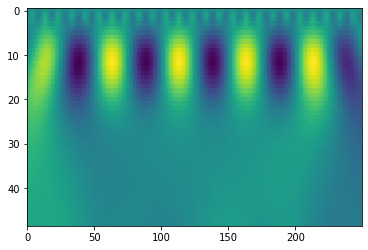

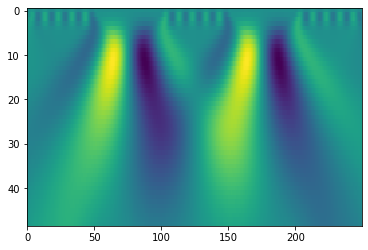

In [38]:
# Тоже самое в Scipy
widths = np.arange(1, 50, 1)
cwtmatr = signal.cwt(y1, signal.ricker, widths)
print(cwtmatr.shape)
plt.imshow(cwtmatr,  aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.figure()

widths = np.arange(1, 50, 1)
cwtmatr = signal.cwt(y2, signal.ricker, widths)
print(cwtmatr.shape)
plt.imshow(cwtmatr,  aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

## Оптимизация

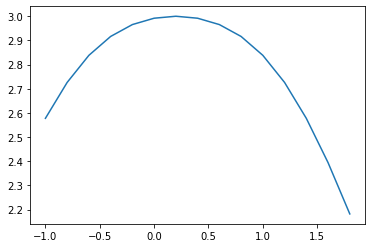

In [39]:
# Исходные данные
x = np.arange(-1, 2, 0.2)
y =  -np.exp(-0.6*(x-0.2)**2) + 4*np.exp(-0.2*(x-0.2)**2) 
plt.plot(x,y)

In [40]:
# Сетка с двумя базисами
class RBF:
    def __init__(self):
        self.w = np.random.rand()
        self.a = np.random.rand()
        self.b = np.random.rand()
        self.w1 = np.random.uniform(2.5, 3.5)
        self.a1 = np.random.rand()
        self.b1 = np.random.rand()
    
    def forward(self, x):
        out = np.exp(-self.a*(x-self.b)**2)*self.w + np.exp(-self.a1*(x-self.b1)**2)*self.w1 
        return out
    
    def backward(self, x, y, y_p):
        mse_d = 2*(y - y_p)
        dw = np.sum(-mse_d*np.exp(-self.a*(x-self.b)**2))
        da = np.sum(-mse_d*self.w * (x-self.b)**2 * (-np.exp(-self.a*(x-self.b)**2)))
        db = np.sum(-mse_d*2 * self.w *self.a * (x-self.b) * np.exp(-self.a*(x-self.b)**2))
        
        dw1 = np.sum(-mse_d*np.exp(-self.a1*(x-self.b1)**2))
        da1 = np.sum(-mse_d*self.w1 * (x-self.b1)**2 * (-np.exp(-self.a1*(x-self.b1)**2)))
        db1 = np.sum(-mse_d*2 * self.w1 *self.a1 * (x-self.b1) * np.exp(-self.a1*(x-self.b1)**2))
        
        return dw, da, db, dw1, da1, db1

def mse(y, y_p):
    return ((y - y_p)**2).mean()

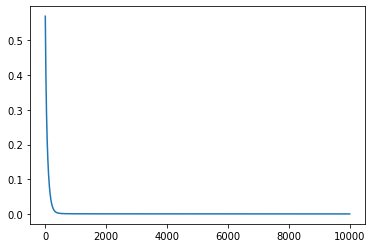

In [41]:
from sklearn.metrics import mean_squared_error
losses = []
rbf = RBF()
lr = 0.005

for i in range(10000):
    y_p = rbf.forward(x)
    loss = mse(y, y_p)
    #print(loss)
    dw, da, db, dw1, da1, db1 = rbf.backward(x,y,y_p)
    losses.append(loss)
    rbf.w -= lr*dw/x.shape[0]
    rbf.a -= lr*da/x.shape[0]
    rbf.b -= lr*db/x.shape[0]
    rbf.w1 -= lr*dw1/x.shape[0]
    rbf.a1 -= lr*da1/x.shape[0]
    rbf.b1 -= lr*db1/x.shape[0]
    
plt.plot(losses) 

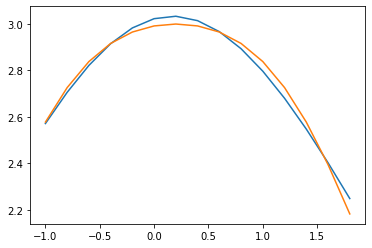

In [42]:
plt.plot(x,y_p)
plt.plot(x,y)

# Статистика

**Среднее значение** $$\frac{\sum_{i=0}^{n} X_i}{n} = \bar{X} = \mu = \mathbb{M}[X] = \mathbb{E}[X]$$

In [54]:
n = 1000
X=np.random.sample(n)
N = len(X)
print(N)

Mu = sum(X)/N
print(Mu)
print ('_'*40)
print(np.mean(X))

1000
0.49866564560121923
________________________________________
0.49866564560121923


**Максимальное и минимальное значение**

In [55]:
Max_x = max(X)
Min_x = min(X)

print('max =', Max_x, '\nmin = ',  Min_x)

max = 0.9970726332875985 
min =  0.0029953508989088995


**Дисперсия** $$\sigma^2=\frac{(\sum_{i=1}^{n}(X_i-\mu)^2)}{(n-1)} = \mathbb{D}[X] = Var(X) = \mathbb{M}[(X - \mathbb{M}[X])^2]$$

In [59]:
Sigma = (sum((X-Mu)**2))/(N-1)
print('sigma ', Sigma)
print ('_'*40)

print('дисперсия через np.var()', np.var(X))
print ('_'*40)

print('стандартное отклонение ', np.std(X))
print ('_'*40)

print('дисперсия через квадрат отклонения', (np.std(X))**2)

sigma  0.0821265792434932
________________________________________
дисперсия через np.var() 0.08204445266424977
________________________________________
стандартное отклонение  0.2864340284677255
________________________________________
дисперсия через квадрат отклонения 0.08204445266424977


**Коэффициент вариации**

In [60]:
kv = (np.sqrt(Sigma)/Mu)*100 

print (kv)

57.46883819092755


**Медиана**

In [61]:
#X = np.array([10, 12, 40, 500, 30, 80, 60, 700, 20, 13, 15, 40, 40, 35, 20, 10, 10])
#mu = np.mean(X)
#print (mu)

print('-'*40)
med = np.percentile(X, 50)
med1=np.median(X)
print (med)
print (med1)

----------------------------------------
0.506532706810683
0.506532706810683


**Мода**

In [62]:
#X = np.array([10, 12, 40, 500, 30, 80, 60, 700, 20, 13, 15, 40, 40, 35, 20, 10, 10])
st.mode(X)

ModeResult(mode=array([0.00299535]), count=array([1]))

**Гистограммы**

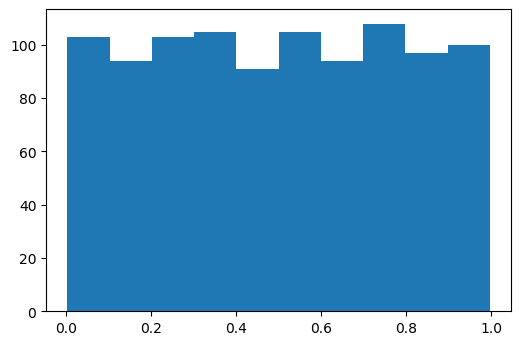

In [64]:
plt.hist(X, bins=10);

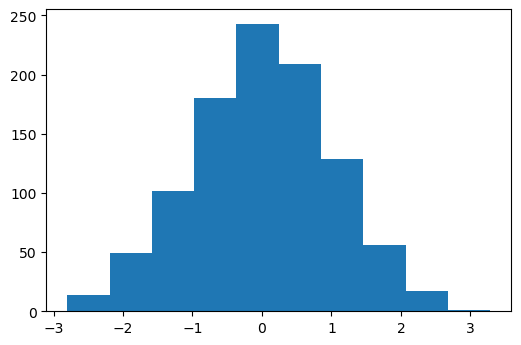

In [65]:
Y = np.random.randn(1000)
plt.hist(Y, bins=10);

**Ассиметрия и эксцесс**

In [66]:
print (st.skew(X))
print (st.skew(Y))
#W = np.array([0.2, -0.2, 0.5, 0.8, 0.6, 0.98, -0.2, -0.1, 0.9, 0.5, 0.58, 0.1, 0.4, 0.5])
#plt.hist(W, bins=10) 
#print (st.skew(W))

print('_ '*40)
print(st.kurtosis(Y))

-0.003206207669138254
-0.046213534761976885
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
-0.2559677570536585


## Функции плотности вероятности  и функции распределения 

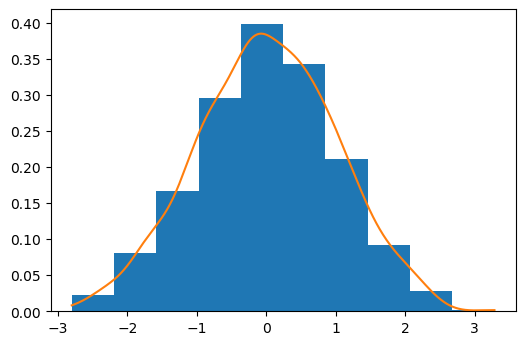

In [67]:
domain = np.linspace(np.max(Y), np.min(Y), 1000)

#print(domain)
kde1 = st.gaussian_kde(Y)

plt.hist(Y, bins=10, density = 1.0) 
plt.plot(domain, kde1(domain));

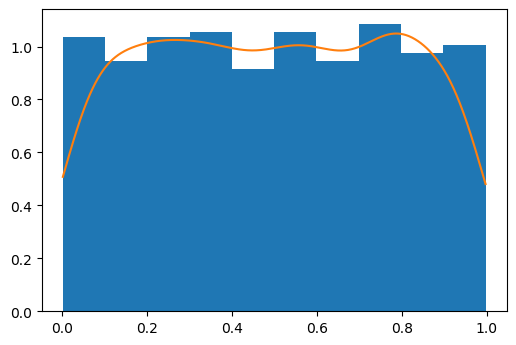

In [68]:
domain = np.linspace(np.max(X), np.min(X), 1000)

#print(domain)
kde1 = st.gaussian_kde(X)

plt.hist(X, bins=10, density = 1.0) 
plt.plot(domain, kde1(domain));

### Определение
$$F(x) = P(X<x)$$ $f(x) = F'(x)$ $$F(x) = P(X\le x) = \int_{-\infty}^x f(x) dx$$ или для интервала $$P(a\le X \le b) = \int_a^b f(x) dx = F(b) - F(a)$$ 

### Непрерывные Случайные Величины

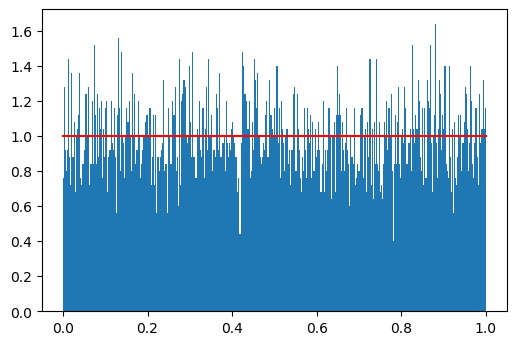

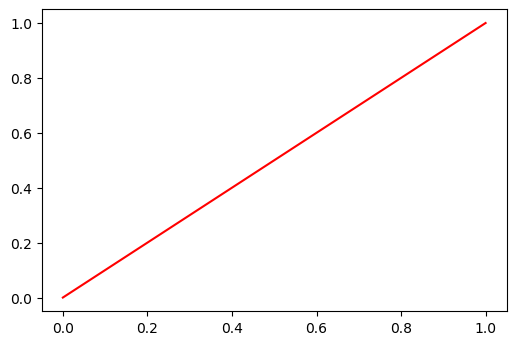

In [76]:
Contin = st.uniform(loc=0, scale=1)  # днородная непрерывная случайная величина
Z = Contin.rvs(size=10000)   # Generate random numbers
plt.hist(Z, bins=400, density = 1.0); 

grid = np.linspace(np.min(Z), np.max(Z), 100)
plt.plot(grid, Contin.pdf(grid), color = 'red');  # Функция плотности вероятности
plt.figure()
plt.plot(grid, Contin.cdf(grid), color = 'red');  # Функция распределения

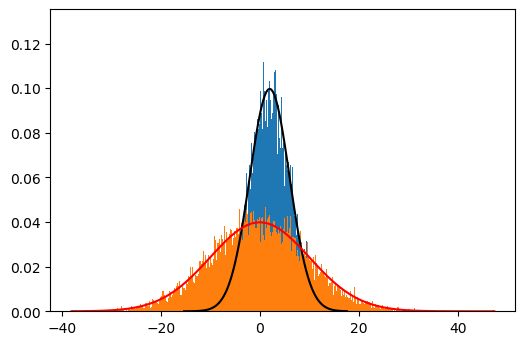

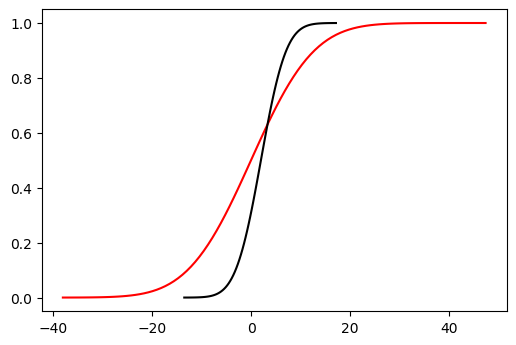

In [79]:
Contin = st.norm(loc=2, scale=4)  # Нормальная непрерывная случайная величина 1
Z_1 = Contin.rvs(size=10000)   # Generate random numbers
plt.hist(Z_1, bins=400, density = 1.0) ;

grid = np.linspace(np.min(Z_1), np.max(Z_1), 100)
plt.plot(grid, Contin.pdf(grid), color = 'black');  # Функция плотности вероятности 1



Contin = st.norm(loc=0, scale=10)  # Нормальная непрерывная случайная величина 2
Z_2 = Contin.rvs(size=10000)   # Generate random numbers
plt.hist(Z_2, bins=400, density = 1.0) ;

grid = np.linspace(np.min(Z_2), np.max(Z_2), 100)
plt.plot(grid, Contin.pdf(grid), color = 'red');  # Функция плотности вероятности 2 



plt.figure()
plt.plot(grid, Contin.cdf(grid), color = 'red');  # Функция распределения 1

Contin = st.norm(loc=2, scale=4)   # Нормальная непрерывная случайная величина
Z_1 = Contin.rvs(size=10000)    # Generate random numbers
grid = np.linspace(np.min(Z_1), np.max(Z_1), 100)
plt.plot(grid, Contin.cdf(grid), color = 'black');    # Функция распределения 2

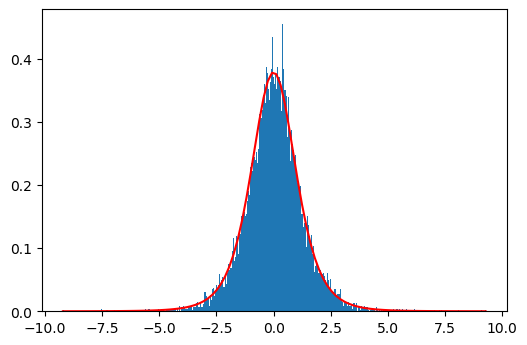

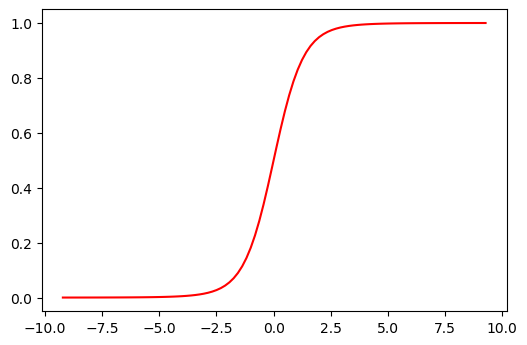

In [74]:
Contin = st.t(5, 0, 1) # непрерывная случайная величина Стьюдента.
Z_1 = Contin.rvs(size=10000)  # Generate random numbers
plt.hist(Z_1, bins=400, density = 1.0);

grid = np.linspace(np.min(Z_1), np.max(Z_1), 100)
plt.plot(grid, Contin.pdf(grid), color = 'red');   # Функция плотности вероятности

plt.figure()
plt.plot(grid, Contin.cdf(grid), color = 'red');  # Функция распределения

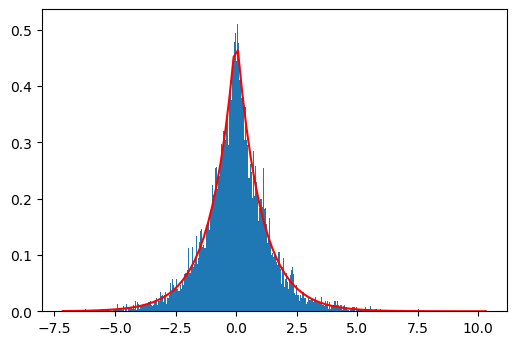

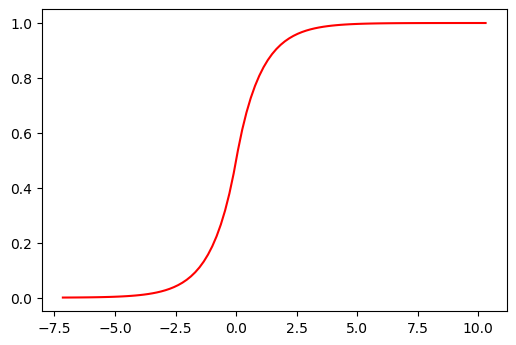

In [75]:
Contin = st.laplace(0, 1)  # непрерывная случайная величин Лапласа
Z_1 = Contin.rvs(size=10000)   # Generate random numbers
plt.hist(Z_1, bins=400, density = 1.0);

grid = np.linspace(np.min(Z_1), np.max(Z_1), 100)
plt.plot(grid, Contin.pdf(grid), color = 'red');   # Функция плотности вероятности

plt.figure()
plt.plot(grid, Contin.cdf(grid), color = 'red');   # Функция распределения

### Дискретные СВ

[0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1]


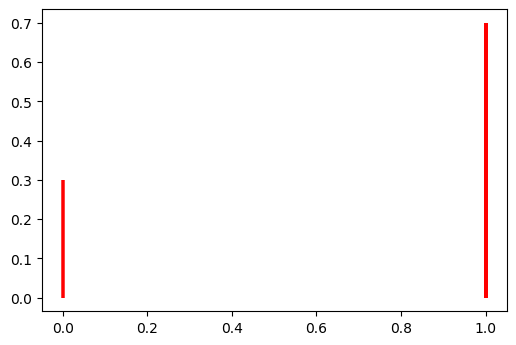

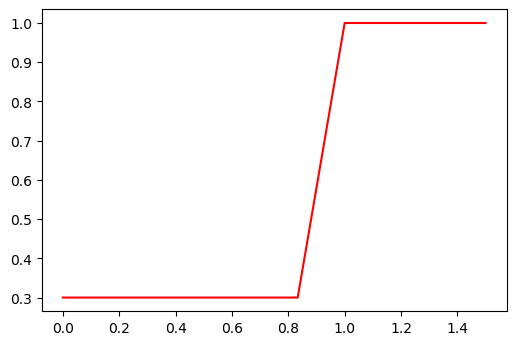

In [81]:
Discr = st.bernoulli(0.7)  # Дискретная случайная величина Бернулли
Z_1 = Discr.rvs(size=100)   # Generate random numbers
print (Z_1)

plt.vlines(Z_1,0, Discr.pmf(Z_1), color = 'red');  # Функция вероятности. 

grid = np.linspace(0.0, 1.5, 10)
plt.figure()
plt.plot(grid, Discr.cdf(grid), color = 'red');  # Функция распределения


[2 2 3 1 1 3 0 3 1 1 2 2 3 0 0 1 0 1 1 2 2 1 2 2 2 2 1 0 3 1 1 0 0 2 0 2 0
 1 2 1 0 3 2 1 0 2 1 3 4 3 1 2 2 2 0 0 2 2 0 1 2 1 1 2 1 1 1 1 0 2 0 0 0 2
 2 0 2 1 0 2 2 3 0 1 3 3 1 2 0 0 2 1 0 2 2 2 0 2 2 1]


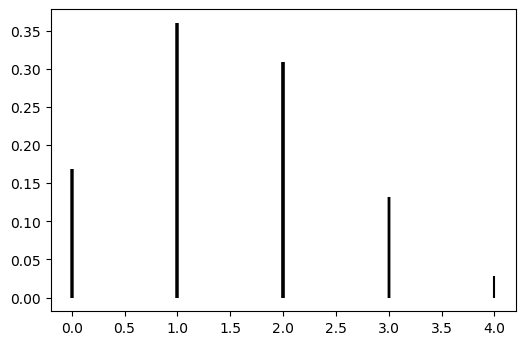

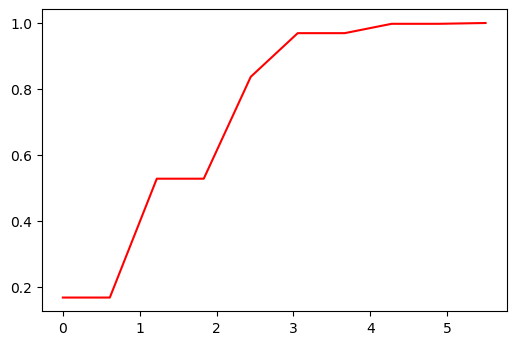

In [82]:
Discr = st.binom(5, 0.3)  # Биномиальная дискретная случайная величина
Z_1 = Discr.rvs(size=100)  # Generate random numbers
print (Z_1)

plt.vlines(Z_1, 0, Discr.pmf(Z_1));   # Функция вероятности. 

grid = np.linspace(0.0, 5.5, 10)
plt.figure()
plt.plot(grid, Discr.cdf(grid), color = 'red');    # Функция распределения

## Моменты СВ, Квантиль, ЦПТ, Репрезентативная выборка
k-м начальным моментом СВ $$v_k = \mathbb{M}[X^k]$$
k-м центральным моментом СВ $$\mu_k = \mathbb{M}[(X - \mathbb{M}X)^k]$$
Репрезентативная выборка $$P(|\widehat{p}-p|<\epsilon)=1-\alpha$$
точность - $\epsilon$, уровень доверия - $\alpha$

Квантиль уровня-$\alpha$ $$F(x_\alpha) = \alpha$$

### Пример
Выведем формулу, определяющую необходимый размер выборки для случая биноминального распределения для заданной погрешностью $\epsilon$ и вероятностью $\alpha$
Возможны 2 случая:
1) Выборка формируется с возвращением (т.е. возможны ситуации, когда одно и тоже наблюдение попадет в нашу выборку m раз)
2) Без возвращения (когда наблюдение может попасть в выборку только один раз)
1. Для $n$ наблюдений будем иметь $x$ наблюдений со значениием 1 и $(n-x)$. Тогда:
$$P(X=K)=C^k_np^k(1-p)^{n-k}$$
$$X \sim Bi(n,p)$$
$$M[X]=np$$
$$D[X]=np(1-p)=npq$$

Исходная задача может быть представлена как: $\widehat{p}-p \sim N(0, \frac{pq}{n})$ в силу центральной предельной теоремы (для случая с большим достаточно большим n).
Тогда:
$1-\alpha=P(|\widehat{p}-p|<\epsilon)=2*\Phi_0(\frac{\epsilon*\sqrt{n}}{\sqrt{pq}})$, где $\Phi_0$ - функция Лапласса
$$\Phi_0(\frac{\epsilon*\sqrt{n}}{\sqrt{pq}}) = 1/2 - \alpha/2$$
Отсюда следует, что:
$$\frac{\epsilon*\sqrt{n}}{\sqrt{pq}} = Z_{1-\alpha/2}$$, тогда
$$n=(\frac{Z_{1-\alpha/2}}{\epsilon})^2pq$$
Поскольку $p$ и $q$ из предыдущей формулы нам не известны по условию, мы можешь задать их $p=q=1/2$, как наихудший случай

In [83]:
# Расчет доверительного интервала
n1 = 1459371 #Решка
n2 = 1184786 #Орел
n = n1+n2 #Общее количество бросков

alpha = 0.95 
z = st.norm 

eps = z.ppf(alpha/2+z.cdf(0))/(2.0*np.sqrt(n)) #радиус доверительного интервала

print(float(n1)/n)
LowI = float(n1)/n-eps #Нижняя граница для вероятности
UpperI= float(n1)/n+eps #Верхняя граница для вероятности
print ('Доверительный интервал:[',LowI,',',UpperI,']')

0.5519229758293475
Доверительный интервал:[ 0.5513203129028185 , 0.5525256387558765 ]


## Определение доверительного интервала для неизвестного параметра нормального распределения.

## Основные определения
Пусть есть выборка $X_1, X_2, ... , X_n$ из распределения $F(X, \theta)$, $\theta \in \Theta \subset R^1$. Говорят, что для параметра $\Theta$ построен доверительный интервал уровня надежности $1-\alpha$, где $0 < \alpha < 1$ и найдены такие статистики $T_1(X_1, ..., X_n)$ и $T_2(X_1, ..., X_n)$, что  $T_1(X_1, ..., X_n) < T_2(X_1, ..., X_n)$ и $P(T_1(X_1, ..., X_n) < \theta < T_2(X_1, ..., X_n)) = 1 - \alpha$,
Интервал со случайными концами $(\ T_1(X_1, ..., X_n), T_2(X_1, ..., X_n)\ )$ называется доверительным интервалом для параметра $\theta$ уровня надежности $1-\alpha$

Случайная функция $G(X,\theta)$ называется центральной статистикой, если она удовлетворяет 2 условиям:
    $$1)$$ $G(X,\theta)$ строгомонотонна и непрерывна по $\theta$ 
    $$2)$$ Функция распределения $G$ $F_{G}$ не зависит от $\theta$. Т.е. $F_{G}(X)$

Дальнейший ход определения доверительных интервалов для параметра $\theta$ будет заключаться в построении неравенства 
$P(F_{G}(X)<Z_{1-\alpha})=1-\alpha$, либо $P(F_{G}(X)>Z_{\alpha})=1-\alpha$, либо $P(Z_{\alpha/2}<F_{G}(X)<Z_{1-\alpha/2})=1-\alpha$ (взависимости от того, какой тип доверительного интервала (правый односторонний, левый односторонний или двусторонний соответственно) нам нужен) и преобразовании его к виду из определения доверительного интервала с целью нахождения его границ. Отдельно стоит отметить, что $Z_\alpha$ - в данном случае это квартиль уровня $\alpha$ распределения $F_{G}(X)$.

## Одновыборочный случай

### 1. Неизвестное мат. ожидание при известной дисперсии
Дано: $X_1, ..., X_n \sim N(\theta, \sigma^2)$

В качестве оценки для мат. ожидания будем использовать выборочное среднее: $\widehat{\theta} = 1/n * \sum_{i=0}^{n} X_i = \bar{X}$


центральная статистика $$\frac{(\widehat{\theta} - \theta)*\sqrt{n}}{\sigma} \sim N(0, 1)$$
Тогда доверительный интервал можно построить след. образом: $$P(Z_{\alpha/2}<\frac{(\widehat{\theta} - \theta)*\sqrt{n}}{\sigma}<Z_{1-\alpha/2})=1-\alpha$$, тогда в силу $z_{\alpha/2} = - z_{1-\alpha/2}$ для нормального распределения, получаем
$$P(\widehat{\theta} - \frac{Z_{1-\alpha/2}*\sigma}{\sqrt{n}} <\theta<\frac{Z_{1-\alpha/2}*\sigma}{\sqrt{n}} + \widehat{\theta} )=1-\alpha$$
Тогда доверительный интервал для $\sigma$ в соответствии с определением дов. интервала определяется:
$$(\ \bar{X} - \frac{Z_{1-\alpha/2}*\sigma}{\sqrt{n}}\ ,\ \bar{X} + \frac{Z_{1-\alpha/2}*\sigma}{\sqrt{n}}\ )$$

### 2. Неизвестная дисперсия при известном мат. ожидании

Дано: $X_1, ..., X_n \sim N(\mu, \theta_2^2)$

Для начала построим оценку для дисперсии. Возьмем выборочную дисперсию: $$\widehat{\theta}^2=S^2=1/n*\sum_{i=1}^{n}(X_i-\mu)^2$$
Данная оценка имеет распределение очень похожее на $\chi^2$. Отнормируем слогаемые на среднеквадратичное отклонение и умножим сумму на n, тогда получим след. статистику: $$\sum_{i=1}^{n}(\frac{(X_i-\mu)}{\theta_2})^2 \sim \chi^2(n)$$, где $n$ - кол-во степеней свободы распределения $\chi^2$

Данная статистика будет являться центральной статистикой (по определению). Соответственно, можем найти границы доверительного интервала для $\theta_2$. Для этого построим неравенство:
$$P(\chi^2_{\alpha/2, n} < \sum_{i=1}^{n}(\frac{(X_i-\mu)}{\theta_2})^2 < \chi^2_{1-\alpha/2, n})=1-\alpha$$, где $\chi^2_{\alpha, n}$ - квантиль уровня $\alpha$ распределения $\chi^2$ с $n$ степенями свободы.
$$(\frac{\sum_{i=1}^{n}(X_i-\mu)^2}{\chi^2_{1-\alpha/2, n}},\ \frac{\sum_{i=1}^{n}(X_i-\mu)^2}{\chi^2_{\alpha/2, n}})$$

### 3. Неизвестная дисперсия при неизвестном мат. ожидании

Дано: $X_1, ..., X_n \sim N(\theta_1, \theta_2^2)$

$$(\frac{\sum_{i=1}^{n}(X_i-\bar{X})^2}{\chi^2_{1-\alpha/2, n-1}},\ \frac{\sum_{i=1}^{n}(X_i-\bar{X})^2}{\chi^2_{\alpha/2, n-1}})$$

### 4. Неизвестное мат. ожидание при неизвестной дисперсии

Дано: $X_1, ..., X_n \sim N(\theta_1, \theta_2^2)$

$$P(t_{\alpha/2, n-1}<\frac{(\bar{X} - \theta_1)*\sqrt{n}}{S}<t_{1-\alpha/2, n-1})=1-\alpha$$
Тогда доверительный интервал будет задаваться: 
$$(\bar{X} - \frac{t_{1-\alpha/2, n-1}*S}{\sqrt{n}}, \frac{t_{1-\alpha/2, n-1}*S}{\sqrt{n}} + \bar{X} )$$

# Проверка статистических гипотез. Параметрические критерии.
## Методика проверки статистических гипотез

#### 1. Сформулировать нулевую гипотезу $H_0$ и альтернативную - $H_1$ (Гипотеза $H_0$ формулируется исходя из требований прикладной задачи. Иногда альтернатива не формулируется в явном виде; тогда предполагается, что $H_1$ означает «не $H_0$»).
#### 2. Сформулировать статистические допущения о распределении выборки.
#### 3. Выбрать тестовую статистику, которая отражает характер допущений.
#### 4. Зафиксировать уровень значимости $1 \le \alpha \le 0$.
#### 5. Рассчитать наблюдаемое значение выбранной статистики.
#### 6. Сдалать вывод о гипотезе $H_0$:
   6.1 На основе критической области $\Omega_\alpha$
   
   6.2 На основе достигаемого уровня значимости (p-value)


## p-value
Достигаемый уровень значимости (p-value) — это наименьшая величина уровня значимости, при которой нулевая гипотеза отвергается для данного значения статистики критерия T:$$p(T) = min \{\alpha: T \in \Omega_\alpha \}$$
 p-value-  вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики (среднего арифметического, медианы и др.), по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.
 Уровень значимости — это вероятность получить значение t меньше или больше данного, если бы H0 была справедлива.

## Критические области
Критический уровень значимости α — это порог для принятия решений.
Обычно используют α=0.05.
Если p≤α — отвергаем H0 и принимаем HA.
Если p>α — сохраняем H0, не можем ее отвергнуть.


Пусть $x_\alpha$ - квантиль уровня-$\alpha$ функции распределения $F$ статистики $T$: $F(x_\alpha) = \alpha$. Здесь $F(t) = P(T<t)$
1. Левосторонняя критическая область:

Определяется интервалом: $\Omega_\alpha \in \{-\infty, x_\alpha \}$

p-value: $P(T) = F(T)$

2. Правосторонняя критическая область:

Определяется интервалом: $\Omega_\alpha \in \{x_{1-\alpha}, \infty \}$

p-value: $P(T) = 1-F(T)$

3. Двухсторонняя критическая область:

Определяется интервалом: $\Omega_\alpha \in \{-\infty, x_{\alpha/2} \}U\{x_{1-\alpha/2}, \infty \}$

p-value: $P(T) = min\{2F(T), 2(1-F(T))\}$

## Ошибки первого и второго рода

1. Ошибка первого рода («ложная тревога»)  — когда нулевая гипотеза отвергается, хотя на самом деле она верна. Вероятность ошибки первого рода:$$\alpha = P\{T \in \Omega_\alpha | H_0\}$$
2. Ошибка второго рода («пропуск цели»)  — когда нулевая гипотеза принимается, хотя на самом деле она не верна. Вероятность ошибки второго рода:$$\beta = P\{T \notin \Omega_\alpha | H_1\}$$
Мощность критерия $1-\beta(H) = P\{T \in \Omega_\alpha | H\}$ - вероятность отклонить гипотезу $H_0$, если на самом деле верна альтернативная гипотеза $H$. (Мощность критерия является числовой функцией от альтернативной гипотезы $H$)

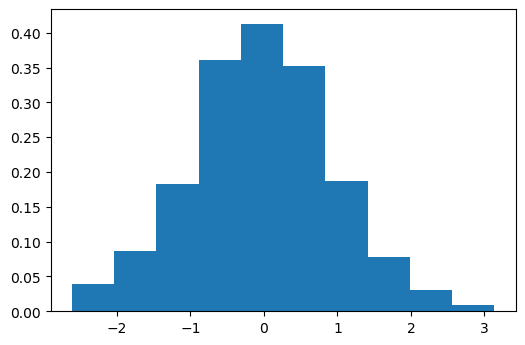

In [191]:
X = np.random.randn(400)
plt.hist(X, bins=10, density = 1);

# T-test

Дано: $X_1, ..., X_n \sim N$ 

$$H_0: \mu = a $$ $$H_1: \mu > a$$

значение t -статистики $$\frac{\sqrt{n}*(\bar{X}-a)}{S} \sim t(n-1)$$

T-test, он же тест Стьдента, используется для проверки статистических гипотез о равенстве математических ожиданий двух выборок, либо о равенстве некоторому значению математического ожидания одной выборки.    
При t > alpha (критического значения) ->нулевая гипотеза опровергается


**alpha - заданный исследователем уровень значимости.**

**Если наблюдаемое значение критерия (St) принадлежит критической области, гипотезу H0 отвергают, если не принадлежит - не отвергают.**

*__________*

    
**Алгоритм    
1.Считаем статистику (St)    
2.Считаем критическую область krit    
Елсли St внутри krit -> отклоняем H0, иначе не отклоняем.**    
     
**3.Считаем p - 'площадь хвостов в распределении вероятности' - вероятность опровергнуть H0 если H0 верно.    
Чем меньше p, тем сильнее аргументы против H0. Следует решить сколько аргументов позволяют опровергнуть H0.    
Если p<alpha=0.05 -> аргументов достаточно чтобы опровергнуть H0, иначе аргументов для опровержения недостаточно.**    

In [192]:
alpha = 0.05;  # Критический уровень значимости (порог принятия решения)
a = -0.025;  # Значение мат.ожидания для проверки гипотезы

X_mean = np.mean(X);
print('среднее арифметическое ', X_mean)
Std = np.std(X);
print('среднеквадратичное (стандартное) отклонение', Std)
print('_'*40)

St = np.sqrt(len(X))*(X_mean-a)/Std  # Статистика - величина количественно
# отражает аргументы в наборе данных против нулевой гипотезы.
print('Stat (T-test) = ', St)

среднее арифметическое  -0.02310103458864451
среднеквадратичное (стандартное) отклонение 0.9602361830721614
________________________________________
Stat (T-test) =  0.03955204864869758


$$H_0: \mu = a $$ $$H_1: \mu > a$$

In [195]:
# Правосторонняя критическая область
Krit = st.t.ppf(0.95, len(X)-1)   # Функция квантилей
print('\nkrit = ', Krit)
print('p-value (уровень значимости) = ', st.t.sf(St, len(X)-1))
# p-value это наименьшая величина уровня значимости,
# при которой нулевая гипотеза отвергается для данного значения статистики Stat


krit =  1.6486815335554057
p-value (уровень значимости) =  0.48423501975948496


$$H_0: \mu = a $$ $$H_1: \mu < a$$

In [196]:
# Левосторонняя критическая область
Krit = st.t.ppf(0.05, len(X)-1)
print('krit = ', Krit)
print('p-value = ', st.t.cdf(St, len(X)-1))

krit =  -1.6486815335554064
p-value =  0.5157649802405151


$$H_0: \mu = a $$ $$H_1: \mu \neq a$$

In [197]:
# Двухсторонняя критическая область
print('krit = [', st.t.ppf(0.025, len(X)-1),',',st.t.ppf(0.975, len(X)-1),']')
print('p-value = ', min(2.0*st.t.cdf(St, len(X)-1), 2.0*(1.0-st.t.cdf(St, len(X)-1))))

krit = [ -1.9659272959208094 , 1.965927295920809 ]
p-value =  0.9684700395189698


In [198]:
st.ttest_1samp(X, a)  # Вычислить T-тест для среднего значения одной группы баллов.

Ttest_1sampResult(statistic=0.0395025776491632, pvalue=0.9685094560599792)

In [199]:
#Построим доверительный интервал
X_mean-(Std*st.t.ppf(0.975, len(X)-1))/np.sqrt(len(X)), X_mean+(Std*st.t.ppf(0.975, len(X)-1))/np.sqrt(len(X))

(-0.11748876073026317, 0.07128669155297414)

## Двувыборочный случай
Пусть имеются две независимые выборки объемами n1 и n2 нормально распределенных случайных величин X и Y

### Критерий сдвига  (Проверяется гипотеза сдвига, согласно которой распределения двух выборок имеют одинаковую форму и отличаются только сдвигом на константу.)

1. Неизвестная разница мат. ожиданий при неизвестных, но не равных дисперсиях

Дано: $$X_1, ..., X_{n_1} \sim N(\mu_1, \sigma_1^2)$$
$$Y_1, ..., Y_{n_2} \sim N(\mu_2, \sigma_2^2)$$
$X$ и $Y$  - независимы, $\sigma_1 != \sigma_2$ 
$$H_0: \mu_1-\mu_2 = \theta $$ $$H_1: \mu_1-\mu_2 \neq \theta$$
Центральная статистика имеет вид: $$\frac{\bar{X}-\bar{Y}-\theta}{\sqrt{S_1^2/n_1+S_2^2/n_2}} \sim t(k)$$.     
Уравнение Уэла-Саттеруэйта:    
$$k=\frac{(s_1^2/n_1+s_2^2/n_2)^2}{(s_1^2/n_1)^2/(n_1-1)+(s_2^2/n_2)^2/(n_2-1)}$$    
k - приблизительное число степеней свободы - это количество значений в итоговом вычислении статистики, способных варьироваться. Иными словами, количество степеней свободы показывает размерность вектора из случайных величин, количество «свободных» величин, необходимых для того, чтобы полностью определить вектор.

S - выборочная дисперсия (несмещенная оценка дисперсии) - это оценка теоретической дисперсии распределения, рассчитанная на основе данных выборки. 

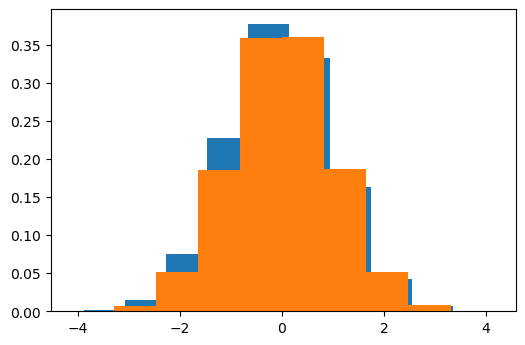

In [183]:
def df(X_1, X_2):
    n_1 = len(X_1);
    n_2 = len(X_2);
    s_1 = (sum((X_1-np.mean(X_1))**2))/(n_1-1.0)#np.var(X_1);
    s_2 = (sum((X_2-np.mean(X_2))**2))/(n_2-1.0)#np.var(X_2);
    
    k = (((s_1/n_1)+(s_2/n_2))**2)/((((s_1/n_1)**2)/(n_1-1)) + (((s_2/n_2)**2)/(n_2-1)));
    
    return k;

Y = np.random.randn(22000);
X = np.random.randn(17000);

plt.hist(Y, bins=10, density = 1);
plt.hist(X, bins=10, density = 1);


In [184]:
theta = 1.0;

x_mean = np.mean(X);
S_1 = (sum((X-np.mean(X))**2))/(len(X)-1.0);   # Выборочная дисперсия
print('x_mean = ', x_mean, 'S1^2 = ', S_1, 'n1 = ', len(X));

y_mean = np.mean(Y);
S_2 = (sum((Y-np.mean(Y))**2))/(len(Y)-1.0);
print('y_mean = ', y_mean, 'S2^2 = ', S_2, 'n2 = ', len(Y));

St = (x_mean-y_mean-theta)/np.sqrt((S_1/len(X))+(S_2/len(Y)))
print('St = ', St);

k = int(df(X, Y));
print('k = ', k);

print('_'*40);
print('Krit1 = ', st.t.ppf(0.025, k));
print('Krit2 = ', st.t.ppf(0.975, k));

x_mean =  0.008968337263924276 S1^2 =  0.9949139985865402 n1 =  17000
y_mean =  -0.0010242199762842917 S2^2 =  1.0136207480725512 n2 =  22000
St =  -96.8003039759367
k =  36716
________________________________________
Krit1 =  -1.9600285980084604
Krit2 =  1.96002859800846


2. Неизвестная разница мат. ожиданий при неизвестных, но равных дисперсиях

Дано: $$X_1, ..., X_{n_1} \sim N(\mu_1, \sigma_1^2)$$
$$Y_1, ..., Y_{n_2} \sim N(\mu_2, \sigma_2^2)$$
$X$ и $Y$  - независимы, $\sigma_1 = \sigma_2$ 
$$H_0: \mu_1-\mu_2 = \theta $$ $$H_1: \mu_1-\mu_2 \neq \theta$$
Центральная статистика имеет вид: $$\frac{\bar{X}-\bar{Y}-\theta}{S_x\sqrt{1/n_1+1/n_2}} \sim t(n_1+n_2-2)$$.
$$S_x^2=\frac{(s_1^2(n_1-1)+s_2^2(n_2-1))}{n_1+n_2-2}$$

### Проверка гипотез про равенство дисперсий

Дано: $$X_1, ..., X_n \sim N(\mu_1, \sigma_1^2)$$
$$Y_1, ..., Y_m \sim N(\mu_2, \sigma_2^2)$$
$X$ и $Y$  - независимы, требуется проверить гипотезу $H_0: \sigma_1 = \sigma_2$

Сначала считаем выборочные дисперсии:
$$\widehat{\sigma_1}=\frac{1}{n-1}*\sum_{i=1}^{n}(X_i-\bar{X})^2$$
$$\widehat{\sigma_2}=\frac{1}{m-1}*\sum_{i=1}^{m}(Y_i-\bar{Y})^2$$

Cтатистика: $$F=\widehat{\sigma_1}/\widehat{\sigma_2} \sim F(n-1, m-1)$$

In [187]:
Y = np.random.randn(220);
X = np.random.randn(170);
X = 1*X


x_mean = np.mean(X);
S_1 = (sum((X-np.mean(X))**2))/(len(X)-1.0);
n = len(X);
print('x_mean = ', x_mean, 'S1^2 = ', S_1, 'n1 = ', n);

y_mean = np.mean(Y);
S_2 = (sum((Y-np.mean(Y))**2))/(len(Y)-1.0);
m = len(Y);
print('y_mean = ', y_mean, 'S2^2 = ', S_2, 'n2 = ', m);

St = S_2/S_1;

print('St = ', St)

print('_'*40);
print('Krit1 = ', st.f.ppf(0.025, n-1, m-1));
print('Krit2 = ', st.f.ppf(0.975, n-1, m-1));


x_mean =  -0.07031028986684396 S1^2 =  1.0191769766490217 n1 =  170
y_mean =  0.06927923697904012 S2^2 =  0.9580048011382962 n2 =  220
St =  0.9399788487060853
________________________________________
Krit1 =  0.7502829498612917
Krit2 =  1.3258009925480954


### Критерии согласия. (это критерии проверки гипотез о соответствии эмпирического распределения теоретическому распределению вероятностей.)

### Критерий соласия $\chi^2$ Пирсона

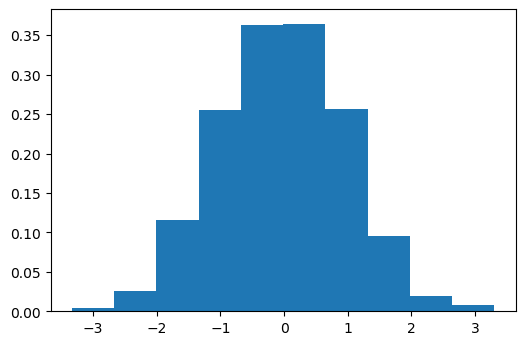

In [200]:
Y = np.random.randn(1000);
plt.hist(Y, bins=10, density = 1);

In [201]:
k = 15
N = len(Y)
print(N)

grid = np.linspace(min(Y), max(Y), k)
print(grid)

#строим статистический ряд
f_obs = np.zeros(k-1)

for i in range(k-1):
    for j in range(N):
        if Y[j] == grid[i] and i == 0:
            f_obs[i] = f_obs[i] + 1.0
        elif (Y[j] > grid[i] and Y[j] <= grid[i+1]):
            f_obs[i] = f_obs[i] + 1.0
            
print(f_obs)
#f_obs =f_obs/N;
#print(f_obs)
print(np.sum(f_obs));

#for i in range(k-1):
#    x_i[i] = grid[i+1] - grid[i];

    
f_exp = np.zeros(k-1);


for i in range(k-1):
    f_exp[i] = N*(st.norm.cdf(grid[i+1]) - st.norm.cdf(grid[i]));#z.cfd(grid[i+1]) - z.cfd(grid[i])
 
print(f_exp)

print('\n',st.chisquare(f_obs, f_exp), '\n', '_'*40)

St = 0.0;

for i in range(k-1):
    St = St + ((f_obs[i]-f_exp[i])**2)/f_exp[i]

print('Stat = ', St)
print('Krit1 = ', st.chi2.ppf(0.025, k-1))
print('Krit2 = ', st.chi2.ppf(0.975, k-1))



1000
[-3.33459349 -2.8605049  -2.38641631 -1.91232772 -1.43823913 -0.96415054
 -0.49006195 -0.01597336  0.45811524  0.93220383  1.40629242  1.88038101
  2.3544696   2.82855819  3.30264678]
[  2.   7.  16.  53. 102. 159. 168. 187. 128. 113.  43.  15.   4.   3.]
1000.0
[  1.68771418   6.39190453  19.41034667  47.26602202  92.30212096
 144.55980308 181.58279182 182.93734907 147.81922768  95.79694375
  49.7905704   20.75350451   6.93667046   1.85902525]

 Power_divergenceResult(statistic=15.189337942609042, pvalue=0.29568243373254427) 
 ________________________________________
Stat =  15.189337942609042
Krit1 =  5.628726103039734
Krit2 =  26.11894804503737


### Статистическая проверка наличия корреляции. Коэффициент корреляции Пирсона

$$r_{xy} = \frac {\sum_{i=1}^{m} \left( x_i-\bar{x} \right)\left( y_i-\bar{y} \right)}{\sqrt{\sum_{i=1}^{m} \left( x_i-\bar{x} \right)^2 \sum_{i=1}^{m} \left( y_i-\bar{y} \right)^2}} = \frac {cov(x,y)}{\sqrt{s_x^2 s_y^2}}$$

$|r_{xy} | =1 $ x, y линейно зависимы, 

$r_{xy}=0 $ x, y линейно независимы

(-0.0061640902042601284, 0.6630093020137761)
(1.0, 0.0)


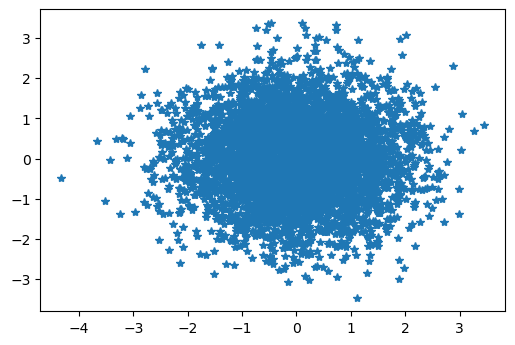

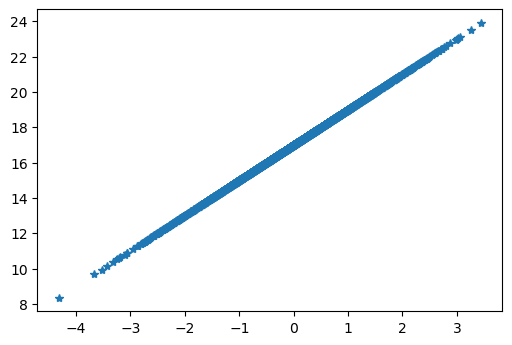

In [203]:
X = np.random.randn(5000);
Y = np.random.randn(5000);

print(st.pearsonr(X, Y))
plt.plot(X, Y, '*');


Y = 2.0*X + 17

print(st.pearsonr(X, Y))
plt.figure()
plt.plot(X, Y, '*');

### Расчет доверительного интервала и проверка гипотезы для сглаж. аппроксимации

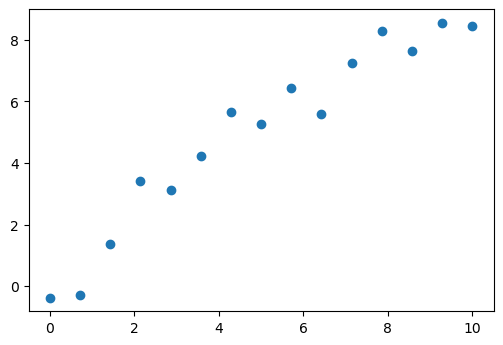

In [434]:
# Данные
n = 15
x = np.linspace(0,10,n)
Delta = 1 * np.random.randn(n)
y = x + Delta

# Начальная фукнция
plt.plot (x,y, 'o')

In [435]:
# Метод наименьших квадратов
def SqLeast (x, y, m):
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    return a

Коэффициенты полинома [0.08803421 0.9786719 ]


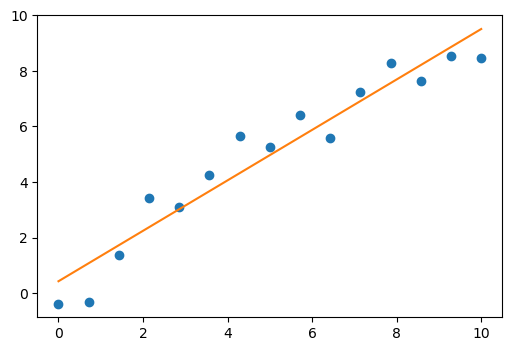

In [436]:
m = 1
PolynomCoefss = SqLeast (x, y, m)
print ('Коэффициенты полинома', PolynomCoefs)

# Полином
PolynomValues = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValues += PolynomCoefss[i]*x**i

plt.plot (x, y, 'o')
plt.plot (x, PolynomValues)

In [437]:
# Точечные оценки a0 и a1
# Полином a0 + a1*X
a0 = (np.sum(y)*np.sum(np.power(x, 2)) - np.sum(x)*np.sum(x*y)) / (n*np.sum(np.power(x, 2)) - np.sum(x)**2)
a1 = (n*np.sum(x*y) - np.sum(x) * np.sum(y)) / (n*np.sum(np.power(x, 2)) - np.sum(x)**2)
a0, a1

(0.42937260351260076, 0.9080302099371196)

In [438]:
# Оценка дисперсии
S2 = (1/(n-2)) * np.sum(y - a0*x - a1)
# Стандартная ошибка дисперсии
S = np.sqrt(S2)
print(S2, S)

2.2091889527285486 1.4863340649828856


In [439]:
alpha = 0.05;  # Критический уровень значимости

# Доверительный интервал для константы a0
# Критическая точка для Ф(krit) = 1 - alpha/2 - где Ф(krit) - функция распределение Стьюдента
krit = st.t.ppf(1 - alpha/2, len(x)-2)
print('Критическая точка ', krit)

p = krit * S * np.sqrt(1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2))

# Доверительный интервал a0 - p < a0 < a0 + p
left = a0 - p
right = a0 + p
print('Значение a0=', a0)
print('Доверительный интервал для a0: [', left, ', ', right, ']')

# с доверительной вероятностью 0.95 интервал (-2.0496668174638177, 2.225735234191208) накрывает значение параметра регрессии a0

Критическая точка  2.1603686564610127
Значение a0= 0.42937260351260076
Доверительный интервал для a0: [ -1.1491567966948257 ,  2.0079020037200275 ]


In [440]:
alpha = 0.05;  # Критический уровень значимости

# Доверительный интервал для константы a1
# Критическая точно Ф(krit) = 1 - alpha/2 - где Ф(krit) - функция распределение Стьюдента
krit = st.t.ppf(1-alpha/2, len(x)-2)
print('Критическая точка ', krit)

p = krit * S / np.sqrt(np.sum(x - np.mean(x))**2)
# Доверительный интервал a1 - p < a1 < a1 + p
left = a1 - p
right = a1 + p
print('Значение a1=', a1)
print('Доверительный интервал для a0: [', left, ', ', right, ']')

# с доверительной вероятностью 0.95 интервал (-407997147621474.7 ,  407997147621476.7) накрывает значение параметра регрессии a1

Критическая точка  2.1603686564610127
Значение a1= 0.9080302099371196
Доверительный интервал для a0: [ -301274820444995.6 ,  301274820444997.5 ]


**Проверка гипотезы о незначимости регрессии**

In [441]:
# Функция считает коэффициент детерминации
def R2 (x, y, Coefs):
    PolynomValue = np.zeros(len(x))
    
    for i in range (0, m+1):
        PolynomValue += Coefs[i]*x**i
   
    y_av = np.sum(y)/len(x)
    y_disp = np.sum((y-y_av)**2)/len(x)    
      
    yv_disp = np.sum((PolynomValue-y_av)**2)/len(x)
  
    return yv_disp/y_disp

Гипотеза (a0 и a1 не оказывают влияние на y)    

\begin{equation*}
H_0 = 
 \begin{cases}
    a0 = 0 \\
    a1 = 0
 \end{cases}
\end{equation*}    

$$H_1:  хотя\; бы\; один\; из\; a0\; a1\; не\; равен\; 0\; (влияет\; на\; y)$$



In [442]:
# Данные 
print('Коэффициенты:', a0, a1)
alpha = 0.05 
print('Уровень значимости:', alpha)
R_2 = R2(x, y, PolynomCoefss)
print('Коэффициент детерминации:', R_2)
n = n
print('Количество значений:', n)
k = 2
print('Количество проверяемых уравнений из H0:', k)

Коэффициенты: 0.42937260351260076 0.9080302099371196
Уровень значимости: 0.05
Коэффициент детерминации: 0.9271660381402882
Количество значений: 15
Количество проверяемых уравнений из H0: 2


In [446]:
# Статистика (для двух значений в H0)
St = (R_2/(k-1)) / ((1-R_2)/(n-k))
print('Наблюдаемое значение статистики:', St)

Наблюдаемое значение статистики: 165.4881622262947


In [456]:
# Критическое значение (степени свободы по числителю статистики = 2, по знаменателю = n-1)
krit = st.t.ppf(1-alpha/2, len(x)-1)
print('Критическое значение:', krit)

Критическое значение: 2.1447866879169273


Т.к. Наблюдаемое значение статистики = 165.49 много больше Критического значения = 2.14 то гипотеза **H0 отвергается**.    
То есть хотя бы один из коэффициентов значим (статистическ связан с результатом y)